In [1]:
%matplotlib inline

# Use z-stacks with ImageContainer

In this example we showcase how to use z-stacks with
`squidpy.im.ImageContainer`

It is possible to acquire several consecutive image slices from the same
tissue. Squidpy\'s [ImageContainer]{.title-ref} supports storing,
processing, and visualization of these z-stacks.

Here, we use the Visium 10x mouse brain sagittal slices as an example of
a z-stack image with two Z dimensions. We will use the \"hires\" images
contained in the `anndata.AnnData` object, but you could also use the
original resolution tiff images in the [ImageContainer]{.title-ref}.

::: seealso
See `sphx_glr_auto_tutorials_tutorial_image_container.py` for a general
introduction to the [ImageContainer]{.title-ref}.
:::

## Import libraries and load individual image sections


In [3]:
import scanpy as sc
import anndata as ad
import squidpy as sq

library_ids = ["V1_Mouse_Brain_Sagittal_Posterior", "V1_Mouse_Brain_Sagittal_Posterior_Section_2"]

adatas, imgs = [], []
use_hires_tiff = False
for library_id in library_ids:
    adatas.append(sc.datasets.visium_sge(library_id, include_hires_tiff=use_hires_tiff))
    adatas[-1].var_names_make_unique()
    if use_hires_tiff:
        imgs.append(sq.im.ImageContainer(adatas[-1].uns["spatial"][library_id]["metadata"]["source_image_path"]))
    else:
        # as we are using a scaled image, we need to specify a scalefactor
        # to allow correct mapping to adata.obsm['spatial']
        imgs.append(
            sq.im.ImageContainer(
                adatas[-1].uns["spatial"][library_id]["images"]["hires"],
                scale=adatas[-1].uns["spatial"][library_id]["scalefactors"]["tissue_hires_scalef"],
            )
        )

100%|███████████████████| 9.26M/9.26M [00:38<00:00, 252kB/s]
100%|███████████████████| 20.1M/20.1M [00:40<00:00, 522kB/s]
/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
100%|███████████████████| 9.26M/9.26M [00:24<00:00, 403kB/s]
100%|███████████████████| 19.0M/19.0M [01:15<00:00, 265kB/s]
/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [25]:
adatas

[AnnData object with n_obs × n_vars = 3355 × 32285
     obs: 'in_tissue', 'array_row', 'array_col'
     var: 'gene_ids', 'feature_types', 'genome'
     uns: 'spatial'
     obsm: 'spatial',
 AnnData object with n_obs × n_vars = 3289 × 32285
     obs: 'in_tissue', 'array_row', 'array_col'
     var: 'gene_ids', 'feature_types', 'genome'
     uns: 'spatial'
     obsm: 'spatial']

In [24]:
imgs

[ImageContainer[shape=(1998, 2000), layers=['image']],
 ImageContainer[shape=(1998, 2000), layers=['image']]]

# Concatenate per-section data to a z-stack

To allow mapping from observations in [adata]{.title-ref} to the correct
Z dimension in [img]{.title-ref}, we will store a `library_id` column in
`adata.obs` and associate each `library_id` to a Z dimension in the
[ImageContainer]{.title-ref}.

For this, we will use `anndata.concat` with `uns_merge = only` (to
ensure that [uns]{.title-ref} entries are correctly concatenated),
`label = 'library_id'` and `keys = library_ids` (to create the necessary
column in `adata.obs`.

To concatenate the individual `squidpy.im.ImageContainer`, we will use
`squidpy.im.ImageContainer.concat`, specifying
`library_ids = library_ids` for associating each image with the correct
observations in [adata]{.title-ref}.


In [27]:
adata = ad.concat(adatas, uns_merge="only", label="library_id", keys=library_ids, index_unique="-")
img = sq.im.ImageContainer.concat(imgs, library_ids=library_ids)

[adata]{.title-ref} now contains a `library_id` column in `adata.obs`,
which maps observations to a unique [library_id]{.title-ref}.


In [28]:
print(adata)
adata.obs

AnnData object with n_obs × n_vars = 6644 × 32285
    obs: 'in_tissue', 'array_row', 'array_col', 'library_id'
    uns: 'spatial'
    obsm: 'spatial'


in_tissue  array_row  \
AAACAAGTATCTCCCA-1-V1_Mouse_Brain_Sagittal_Post...          1         50   
AAACACCAATAACTGC-1-V1_Mouse_Brain_Sagittal_Post...          1         59   
AAACAGAGCGACTCCT-1-V1_Mouse_Brain_Sagittal_Post...          1         14   
AAACAGCTTTCAGAAG-1-V1_Mouse_Brain_Sagittal_Post...          1         43   
AAACAGGGTCTATATT-1-V1_Mouse_Brain_Sagittal_Post...          1         47   
...                                                       ...        ...   
TTGTTGTGTGTCAAGA-1-V1_Mouse_Brain_Sagittal_Post...          1         31   
TTGTTTCACATCCAGG-1-V1_Mouse_Brain_Sagittal_Post...          1         58   
TTGTTTCATTAGTCTA-1-V1_Mouse_Brain_Sagittal_Post...          1         60   
TTGTTTCCATACAACT-1-V1_Mouse_Brain_Sagittal_Post...          1         45   
TTGTTTGTATTACACG-1-V1_Mouse_Brain_Sagittal_Post...          1         73   

                                                    array_col  \
AAACAAGTATCTCCCA-1-V1_Mouse_Brain_Sagittal_Post...        102   
AAACACCAATAACTGC-1-V1_Mouse_Brain_Sagittal_Post...         19   
AAACAGAGCGACTCCT-1-V1_Mouse_Brain_Sagittal_Post...         94   
AAACAGCTTTCAGAAG-1-V1_Mouse_Brain_Sagittal_Post...          9   
AAACAGGGTCTATATT-1-V1_Mouse_Brain_Sagittal_Post...         13   
...                                                       ...   
TTGTTGTGTGTCAAGA-1-V1_Mouse_Brain_Sagittal_Post...         77   
TTGTTTCACATCCAGG-1-V1_Mouse_Brain_Sagittal_Post...         42   
TTGTTTCATTAGTCTA-1-V1_Mouse_Brain_Sagittal_Post...         30   
TTGTTTCCATACAACT-1-V1_Mouse_Brain_Sagittal_Post...         27   
TTGTTTGTATTACACG-1-V1_Mouse_Brain_Sagittal_Post...         41   

                                                                                     library_id  
AAACAAGTATCTCCCA-1-V1_Mouse_Brain_Sagittal_Post...            V1_Mouse_Brain_Sagittal_Posterior  
AAACACCAATAACTGC-1-V1_Mouse_Brain_Sagittal_Post...            V1_Mouse_Brain_Sagittal_Posterior  
AAACAGAGCGACTCCT-1-V1_Mouse_Brain_Sagittal_Post...            V1_Mouse_Brain_Sagittal_Posterior  
AAACAGCTTTCAGAAG-1-V1_Mouse_Brain_Sagittal_Post...            V1_Mouse_Brain_Sagittal_Posterior  
AAACAGGGTCTATATT-1-V1_Mouse_Brain_Sagittal_Post...            V1_Mouse_Brain_Sagittal_Posterior  
...                                                                                         ...  
TTGTTGTGTGTCAAGA-1-V1_Mouse_Brain_Sagittal_Post...  V1_Mouse_Brain_Sagittal_Posterior_Section_2  
TTGTTTCACATCCAGG-1-V1_Mouse_Brain_Sagittal_Post...  V1_Mouse_Brain_Sagittal_Posterior_Section_2  
TTGTTTCATTAGTCTA-1-V1_Mouse_Brain_Sagittal_Post...  V1_Mouse_Brain_Sagittal_Posterior_Section_2  
TTGTTTCCATACAACT-1-V1_Mouse_Brain_Sagittal_Post...  V1_Mouse_Brain_Sagittal_Posterior_Section_2  
TTGTTTGTATTACACG-1-V1_Mouse_Brain_Sagittal_Post...  V1_Mouse_Brain_Sagittal_Posterior_Section_2  

[6644 rows x 4 columns]

[img]{.title-ref} contains the 2D images concatenated along the Z
dimension in one image layer. The Z dimensions are named the same as the
[library_id]{.title-ref}\'s in [adata]{.title-ref} to allow a mapping
from [adata]{.title-ref} to [img]{.title-ref}.


In [29]:
print(img["image"].z)
img

<xarray.DataArray 'z' (z: 2)>
array(['V1_Mouse_Brain_Sagittal_Posterior',
       'V1_Mouse_Brain_Sagittal_Posterior_Section_2'], dtype='<U43')
Coordinates:
  * z        (z) <U43 'V1_Mouse_Brain_Sagittal_Posterior' 'V1_Mouse_Brain_Sag...


ImageContainer[shape=(1998, 2000), layers=['image']]

It is also possible to initialize the [ImageContainer]{.title-ref} with
images that already contain the Z dimension. In this case you need to
specify the `library_id` argument in the constructor. In addition, you
might want to set `dims` to the correct ordering of dimensions manually
for more control.


In [30]:
arr = img["image"].values
print(arr.shape)
img2 = sq.im.ImageContainer(arr, library_id=library_ids, dims=("y", "x", "z", "channels"))
img2

(1998, 2000, 2, 3)


ImageContainer[shape=(1998, 2000), layers=['image']]

Generally, an [ImageContainer]{.title-ref} with more than one Z
dimension can be used in the same way as an [ImageContainer]{.title-ref}
with only one Z dimension. In addition, we can specify
[library_id]{.title-ref} to cropping, pre-processing, and segmentation
functions if we\'d like to only process a specific
[library_id]{.title-ref}.


# Visualization

For using `squidpy.pl.spatial_scatter`, subset the [adata]{.title-ref}
to the desired [library_id]{.title-ref}.


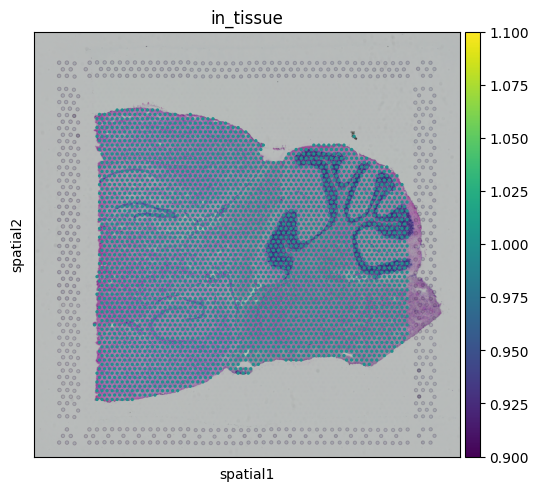

In [31]:
library_id = library_ids[0]
sq.pl.spatial_scatter(adata[adata.obs["library_id"] == library_id], library_id=library_id, color="in_tissue")

`squidpy.im.ImageContainer.show` works with z-stacks out of the box, by
plotting them as separate images. Additionally, you can specify a
[library_id]{.title-ref} if you only want to plot one Z dimension.


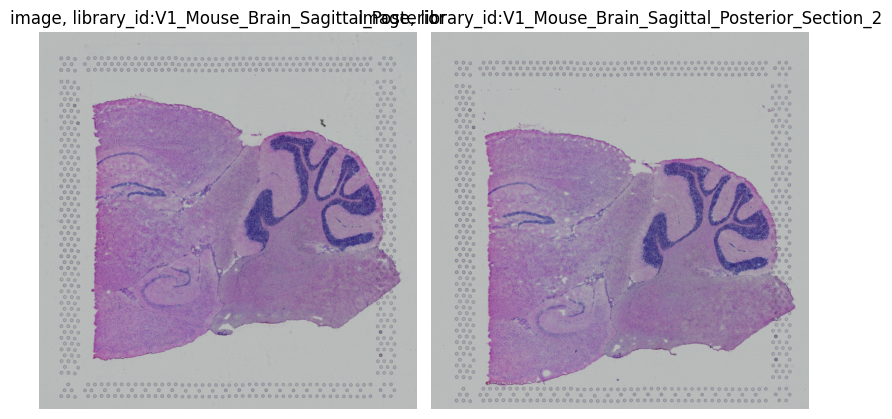

In [32]:
img.show()

Interactive visualization of z-stacks is also possible. The Napari
viewer will have a slider at the bottom, allowing you to choose the Z
dimension to display. The [adata]{.title-ref} observations are
automatically updated to the current Z dimension.

When calling `img.interactive` just specify `library_key` as the column
name in `adata.obs` which maps from observations to
[library_ids]{.title-ref}

In [33]:
img.interactive(adata, library_key='library_id')

Interactive view of ImageContainer[shape=(1998, 2000), layers=['image']]

# Cropping

By default, the cropping functions will crop all Z dimensions.


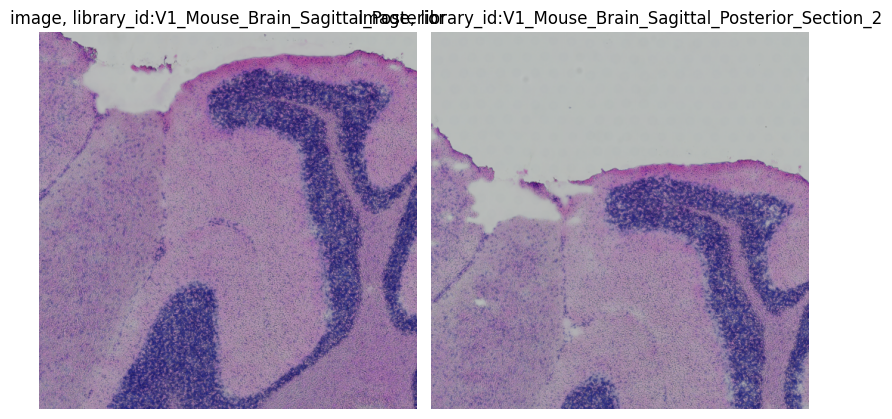

In [34]:
crop = img.crop_corner(500, 1000, size=500)
crop.show()

You can also specify `library_id`, as either a single or multiple Z
dimensions to crop.


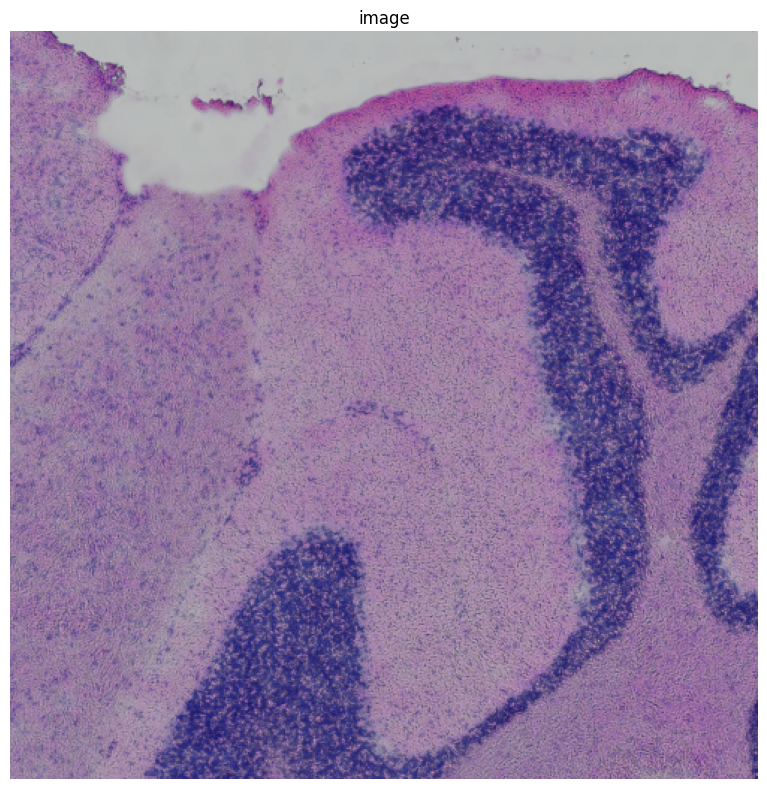

In [35]:
img.crop_corner(500, 1000, size=500, library_id=library_ids[0]).show()

# Processing and segmenting

Let us smooth the image. When not specifying a [library_id]{.title-ref},
`squidpy.im.process` treats the image as a 3D volume. As we would like
to smooth only in x and y dimensions, and not in z, we need so specify a
per-dimension [sigma]{.title-ref}. The internal dimensions of the image
are `y, x, z, channels`, as you can check with `crop['image'].dims`.
Therefore, to only smooth in x and y, we need to specify
`sigma = [10, 10, 0, 0]`.


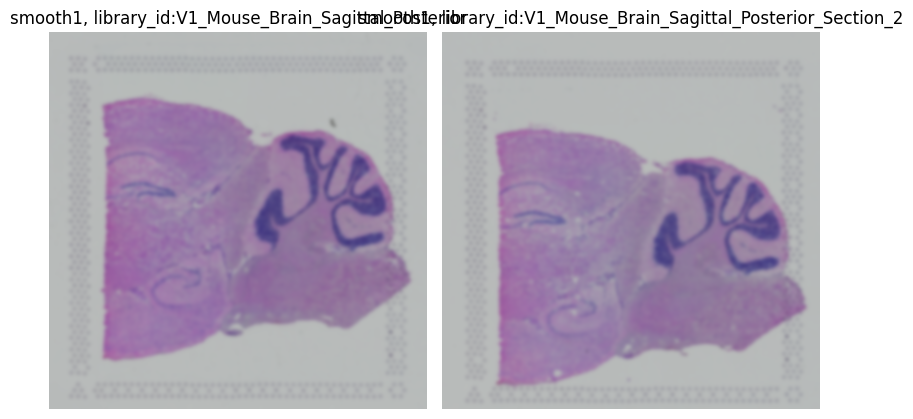

In [36]:
sq.im.process(img, layer="image", method="smooth", sigma=[10, 10, 0, 0], layer_added="smooth1")
img.show("smooth1")

Now, let us just smooth one [library_id]{.title-ref}. Specifying
[library_id]{.title-ref} means that the processing function will process
each Z dimension separately. This means that now the dimensions of the
processed image are `y, x, channels` (with `z` removed), meaning that we
have to update [sigma]{.title-ref} accordingly. If the number of
channels does not change due to the processing, `squidpy.im.process`
implies the identity function for non-processed Z dimensions.


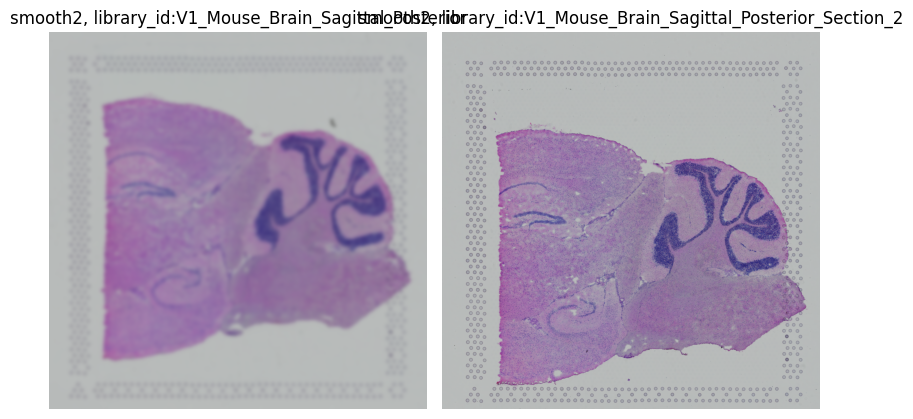

In [37]:
sq.im.process(img, layer="image", method="smooth", sigma=10, layer_added="smooth2", library_id=library_ids[0])
img.show("smooth2")

None, only the first [library_id]{.title-ref} is smoothed. For the
second, the original image was used.

If the processing function changes the number of dimensions,
non-processed Z dimensions will contain 0. Let\'s see this behavior with
using `method = 'gray'`, which moves from 3 channels (RGB) to one
channel (gray).


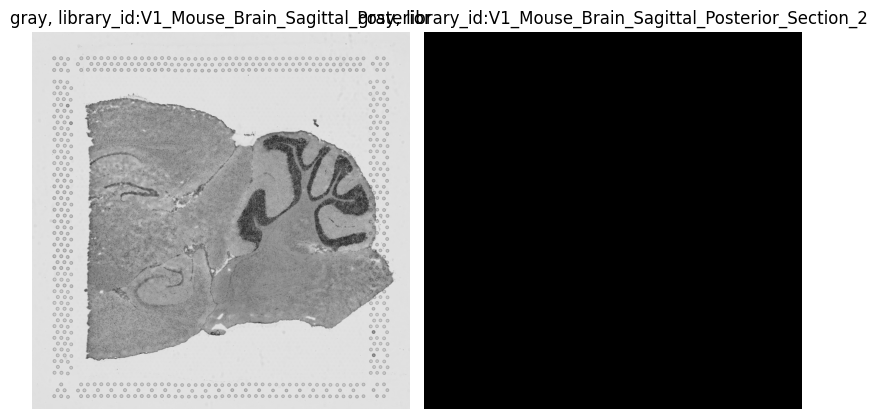

In [38]:
sq.im.process(img, layer="image", method="gray", layer_added="gray", library_id=library_ids[0])
img.show("gray", cmap="gray")

`squidpy.im.segment` works in the same way, just specify
[library_id]{.title-ref} if you only wish to segment specific Z
dimensions.

# Feature calculation

Calculating features from z-stack images is straight forward as well.
With more than one Z dimension, we just need to specify the column name
in `adata.obs` which contains the mapping from observations to
[library_ids]{.title-ref} to allow the function to extract the features
from the correct Z dimension. As of now, features can only be extracted
on 2D, meaning from the Z dimension that the current spot is located on.

The following call extracts features for each observation in
[adata]{.title-ref}, automatically choosing the correct Z dimension in
[img]{.title-ref}.


In [39]:
adata_crop = crop.subset(adata)  # subset adata to the image crop
sq.im.calculate_image_features(adata_crop, crop, library_id="library_id", layer="image", features="summary", n_jobs=4)
adata_crop.obsm["img_features"]

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████████████████| 774/774 [00:06<00:00, 125.48/s]


summary_ch-0_quantile-0.9  \
AAACAGAGCGACTCCT-1-V1_Mouse_Brain_Sagittal_Post...                   0.721569   
AAACGAGACGGTTGAT-1-V1_Mouse_Brain_Sagittal_Post...                   0.450980   
AAATTACCTATCGATG-1-V1_Mouse_Brain_Sagittal_Post...                   0.680784   
AACAGGAAATCGAATA-1-V1_Mouse_Brain_Sagittal_Post...                   0.658824   
AACATATCAACTGGTG-1-V1_Mouse_Brain_Sagittal_Post...                   0.586667   
...                                                                       ...   
TTGGGACACTGCCCGC-1-V1_Mouse_Brain_Sagittal_Post...                   0.635294   
TTGGGCGGCGGTTGCC-1-V1_Mouse_Brain_Sagittal_Post...                   0.643137   
TTGTAAGGCCAGTTGG-1-V1_Mouse_Brain_Sagittal_Post...                   0.670588   
TTGTTCAGTGTGCTAC-1-V1_Mouse_Brain_Sagittal_Post...                   0.647059   
TTGTTGTGTGTCAAGA-1-V1_Mouse_Brain_Sagittal_Post...                   0.662745   

                                                    summary_ch-0_quantile-0.5  \
AAACAGAGCGACTCCT-1-V1_Mouse_Brain_Sagittal_Post...                   0.670588   
AAACGAGACGGTTGAT-1-V1_Mouse_Brain_Sagittal_Post...                   0.309804   
AAATTACCTATCGATG-1-V1_Mouse_Brain_Sagittal_Post...                   0.611765   
AACAGGAAATCGAATA-1-V1_Mouse_Brain_Sagittal_Post...                   0.603922   
AACATATCAACTGGTG-1-V1_Mouse_Brain_Sagittal_Post...                   0.360784   
...                                                                       ...   
TTGGGACACTGCCCGC-1-V1_Mouse_Brain_Sagittal_Post...                   0.580392   
TTGGGCGGCGGTTGCC-1-V1_Mouse_Brain_Sagittal_Post...                   0.592157   
TTGTAAGGCCAGTTGG-1-V1_Mouse_Brain_Sagittal_Post...                   0.627451   
TTGTTCAGTGTGCTAC-1-V1_Mouse_Brain_Sagittal_Post...                   0.584314   
TTGTTGTGTGTCAAGA-1-V1_Mouse_Brain_Sagittal_Post...                   0.623529   

                                                    summary_ch-0_quantile-0.1  \
AAACAGAGCGACTCCT-1-V1_Mouse_Brain_Sagittal_Post...                   0.542745   
AAACGAGACGGTTGAT-1-V1_Mouse_Brain_Sagittal_Post...                   0.200000   
AAATTACCTATCGATG-1-V1_Mouse_Brain_Sagittal_Post...                   0.487843   
AACAGGAAATCGAATA-1-V1_Mouse_Brain_Sagittal_Post...                   0.511373   
AACATATCAACTGGTG-1-V1_Mouse_Brain_Sagittal_Post...                   0.211765   
...                                                                       ...   
TTGGGACACTGCCCGC-1-V1_Mouse_Brain_Sagittal_Post...                   0.480000   
TTGGGCGGCGGTTGCC-1-V1_Mouse_Brain_Sagittal_Post...                   0.502745   
TTGTAAGGCCAGTTGG-1-V1_Mouse_Brain_Sagittal_Post...                   0.537255   
TTGTTCAGTGTGCTAC-1-V1_Mouse_Brain_Sagittal_Post...                   0.476078   
TTGTTGTGTGTCAAGA-1-V1_Mouse_Brain_Sagittal_Post...                   0.510588   

                                                    summary_ch-0_mean  \
AAACAGAGCGACTCCT-1-V1_Mouse_Brain_Sagittal_Post...           0.647495   
AAACGAGACGGTTGAT-1-V1_Mouse_Brain_Sagittal_Post...           0.317769   
AAATTACCTATCGATG-1-V1_Mouse_Brain_Sagittal_Post...           0.599930   
AACAGGAAATCGAATA-1-V1_Mouse_Brain_Sagittal_Post...           0.594231   
AACATATCAACTGGTG-1-V1_Mouse_Brain_Sagittal_Post...           0.385795   
...                                                               ...   
TTGGGACACTGCCCGC-1-V1_Mouse_Brain_Sagittal_Post...           0.564357   
TTGGGCGGCGGTTGCC-1-V1_Mouse_Brain_Sagittal_Post...           0.582867   
TTGTAAGGCCAGTTGG-1-V1_Mouse_Brain_Sagittal_Post...           0.615948   
TTGTTCAGTGTGCTAC-1-V1_Mouse_Brain_Sagittal_Post...           0.571329   
TTGTTGTGTGTCAAGA-1-V1_Mouse_Brain_Sagittal_Post...           0.607930   

                                                    summary_ch-0_std  \
AAACAGAGCGACTCCT-1-V1_Mouse_Brain_Sagittal_Post...          0.074835   
AAACGAGACGGTTGAT-1-V1_Mouse_Brain_Sagittal_Post...          0.095004   
AAATTACCTATCGATG-1-V1_Mouse_Brain_Sagitt

The calculated features can now be used in downstream Scanpy analyses,
by e.g. using all Z dimensions to cluster spots based on image features
and gene features.

Here, we cluster genes and calculated features using a standard Scanpy
workflow.


In [40]:
sc.pp.normalize_total(adata_crop, inplace=True)
sc.pp.log1p(adata_crop)
sc.pp.pca(adata_crop)
sc.pp.neighbors(adata_crop)
sc.tl.leiden(adata_crop)

sc.pp.neighbors(adata_crop, use_rep="img_features", key_added="neigh_features")
sc.tl.leiden(adata_crop, neighbors_key="neigh_features", key_added="leiden_features")

Visualize the result interactively using Napari, or statically using
`squidpy.pl.spatial_scatter`:

``` python
img.interactive(adata, library_key='library_id')
```


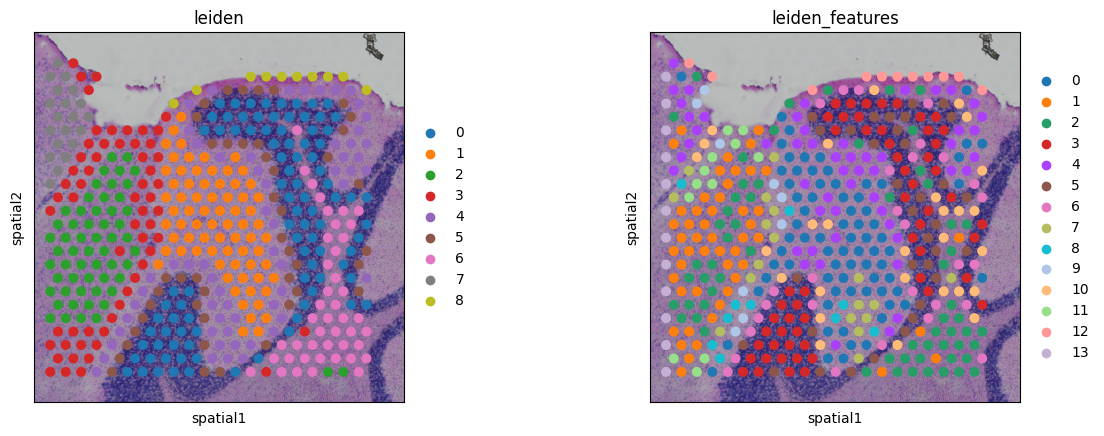

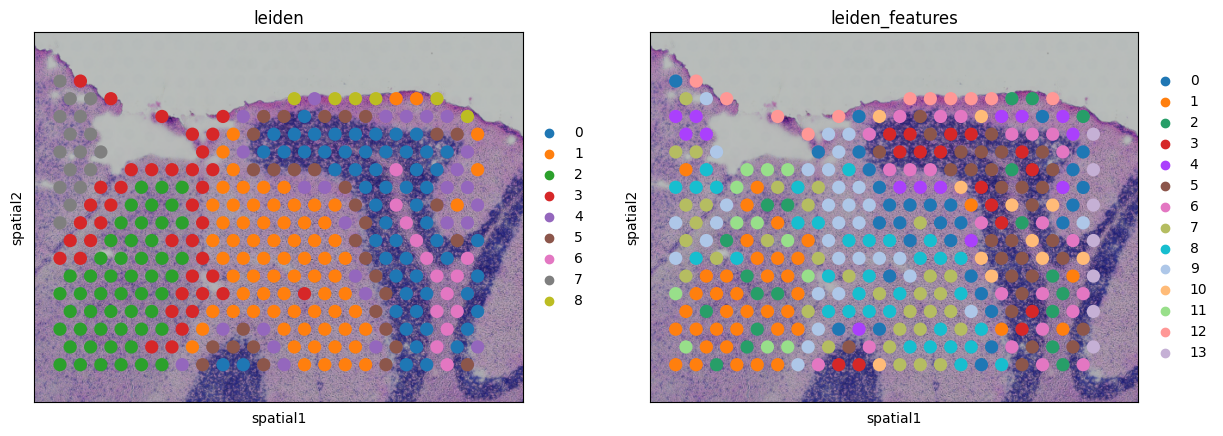

In [41]:
sq.pl.spatial_scatter(
    adata_crop,
    library_key="library_id",
    crop_coord=(5700, 2700, 9000, 6000),
    library_id=library_ids[0],
    color=["leiden", "leiden_features"],
)

sq.pl.spatial_scatter(
    adata_crop,
    library_key="library_id",
    crop_coord=(5700, 3500, 9000, 6000),
    library_id=library_ids[1],
    color=["leiden", "leiden_features"],
)